In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams.update({'font.size': 18})

In [20]:
# Load dataset
H = np.loadtxt(os.path.join('DATA', 'housing.data'))

In [21]:
b = H[:, -1] # y factors <housing values in $1000>
A = H[:, :-1] # x factors

In [22]:
# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @U.T @ b

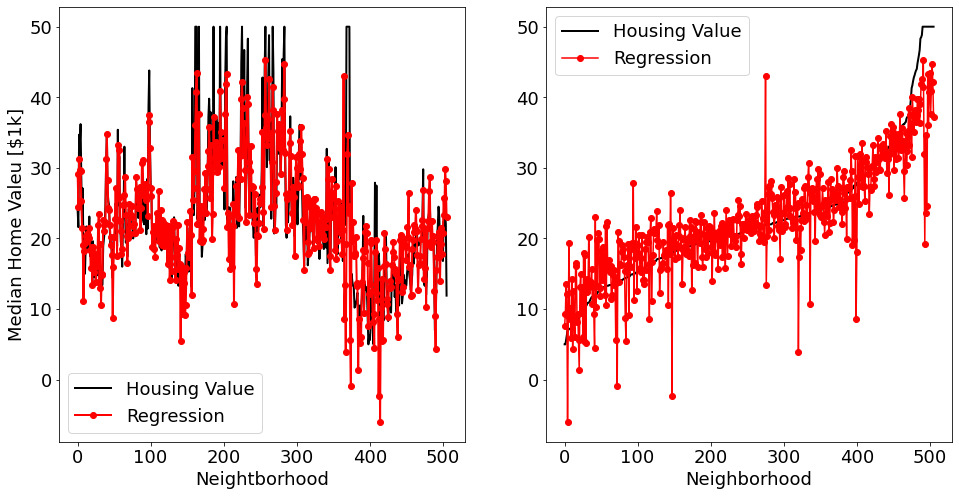

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b, color='k', linewidth=2, label="Housing Value")
plt.plot(A@x, '-o', color='r', linewidth=2, markersize=6, label="Regression")
plt.xlabel('Neightborhood')
plt.ylabel('Median Home Valeu [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:, -1]) # np.argsort 정렬해주기
b = b[sort_ind] # sorted values
plt.plot(b, color='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(A[sort_ind,:]@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.legend()

In [87]:
# import pandas as pd
# pd.DataFrame(A).head()

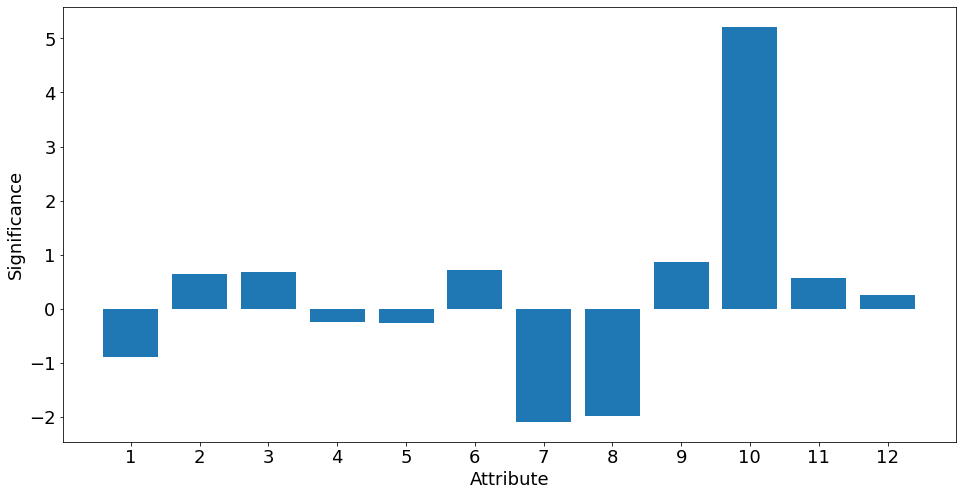

In [88]:
A_mean = np.mean(A, axis=0)
A_mean = A_mean.reshape(-1, 1)
A2 = A - np.ones((A.shape[0],1)) @ A_mean.T
A2 = A - np.ones((A.shape[0],1)) @ A_mean.T

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std # normalization 정규화
    
A2[:,-1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x)-1)+np.ones(len(x)-1)
plt.bar(x_tick,x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()


In [89]:
x

array([-0.90109902,  0.64396482,  0.67665345, -0.25017006, -0.27194484,
        0.70954139, -2.09822768, -1.98135833,  0.8658397 ,  5.21702114,
        0.57375493,  0.25944871, 22.53280632])